# Clash Royale Battle Data Exploration

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
pd.set_option('display.max_columns', None)

FILE_PATH = 'cse158-assignment2-master.csv'
SAMPLE_SIZE = 1_000_000

df = pd.read_csv(
    FILE_PATH,
    nrows=SAMPLE_SIZE,
    low_memory=True,
    dtype={
        "loser.trophies": pd.Int16Dtype(),
        "winner.trophies": pd.Int16Dtype(),
        "winner.troops": pd.Int16Dtype(),
        "winner.structures": pd.Int16Dtype(),
        "winner.spells": pd.Int16Dtype(),
        "loser.troops": pd.Int16Dtype(),
        "loser.structures": pd.Int16Dtype(),
        "loser.spells": pd.Int16Dtype(),
    },
)
df.drop("Unnamed: 0", axis=1, inplace=True)


In [58]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (1000000, 22)

Column Names: ['winner.trophies', 'winner.isinclan', 'loser.trophies', 'loser.isinclan', 'winner.cards', 'winner.troops', 'winner.structures', 'winner.spells', 'winner.commons', 'winner.rares', 'winner.epics', 'winner.legendaries', 'winner.elixir.average', 'loser.cards', 'loser.troops', 'loser.structures', 'loser.spells', 'loser.commons', 'loser.rares', 'loser.epics', 'loser.legendaries', 'loser.elixir.average']

First 5 rows:


,winner.trophies,winner.isinclan,loser.trophies,loser.isinclan,winner.cards,winner.troops,winner.structures,winner.spells,winner.commons,winner.rares,winner.epics,winner.legendaries,winner.elixir.average,loser.cards,loser.troops,loser.structures,loser.spells,loser.commons,loser.rares,loser.epics,loser.legendaries,loser.elixir.average
0,5372,True,5354,True,"[26000003, 26000004, 26000006, 26000008, 26000...",5,1,2,3,2,3,0,4.500,"[26000000, 26000015, 26000023, 27000004, 28000...",3,1,4,1,1,4,2,3.500
1,5409,False,5405,True,"[26000000, 26000010, 26000026, 26000040, 26000...",5,1,2,2,2,2,2,2.875,"[26000023, 26000027, 26000037, 26000046, 26000...",6,1,1,0,1,2,5,4.250
2,5749,True,5733,True,"[26000010, 26000042, 26000044, 26000055, 26000...",6,0,2,2,1,2,3,3.500,"[26000022, 26000027, 26000028, 26000041, 26000...",7,0,1,4,2,1,1,4.125
3,4316,True,4298,True,"[26000016, 26000023, 26000026, 26000041, 28000...",4,0,4,1,1,3,3,3.250,"[26000012, 26000027, 26000031, 26000033, 26000...",6,1,1,2,1,2,3,3.750
4,5783,True,5770,True,"[26000010, 26000014, 26000021, 26000030, 26000...",5,1,2,3,4,0,1,2.625,"[26000010, 26000011, 26000021, 26000037, 26000...",5,1,2,2,4,0,2,3.250


In [59]:
df.describe()

,winner.trophies,loser.trophies,winner.troops,winner.structures,winner.spells,winner.commons,winner.rares,winner.epics,winner.legendaries,winner.elixir.average,loser.troops,loser.structures,loser.spells,loser.commons,loser.rares,loser.epics,loser.legendaries,loser.elixir.average
count,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,4732.462993,4731.791999,5.616992,0.434842,1.948166,2.037757,1.991118,2.275796,1.695329,3.835736,5.612921,0.449681,1.937398,2.052727,2.023654,2.244362,1.679257,3.831667
std,778.502191,778.539755,1.09377,0.586106,0.86723,1.310777,1.266420,1.406816,1.251777,0.520909,1.112468,0.617589,0.898244,1.322980,1.281949,1.411338,1.271941,0.532007
min,25.0,25.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.500000
25%,4366.0,4365.0,5.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,3.500000,5.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,3.500000
50%,4722.0,4721.0,6.0,0.0,2.0,2.000000,2.000000,2.000000,2.000000,3.875000,6.0,0.0,2.0,2.000000,2.000000,2.000000,2.000000,3.875000
75%,5148.0,5147.0,6.0,1.0,2.0,3.000000,3.000000,3.000000,2.000000,4.125000,6.0,1.0,2.0,3.000000,3.000000,3.000000,2.000000,4.125000
max,7378.0,7411.0,8.0,8.0,8.0,8.000000,8.000000,8.000000,8.000000,7.375000,8.0,8.0,8.0,8.000000,8.000000,8.000000,8.000000,7.696429


## Check missing values

In [60]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    print(missing_values)
else:
    print("No missing values found in the sample.")

No missing values found in the sample.


## Feature Distribution Analysis

### Frequency distributions

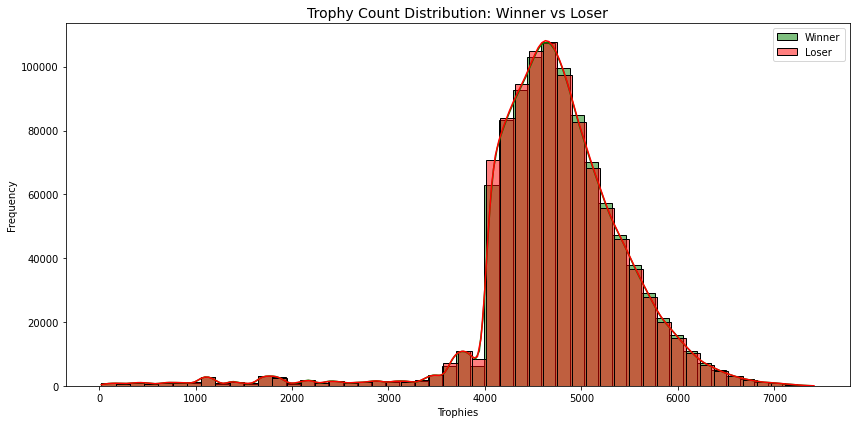

Winner Trophies - Mean: 4732, Median: 4722
Loser Trophies  - Mean: 4732, Median: 4721


In [61]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(df['winner.trophies'], bins=50, kde=True, color='green', alpha=0.5, label='Winner', ax=ax)
sns.histplot(df['loser.trophies'], bins=50, kde=True, color='red', alpha=0.5, label='Loser', ax=ax)

ax.set_title('Trophy Count Distribution: Winner vs Loser', fontsize=14)
ax.set_xlabel('Trophies')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()
plt.show()

print(f"Winner Trophies - Mean: {df['winner.trophies'].mean():.0f}, Median: {df['winner.trophies'].median():.0f}")
print(f"Loser Trophies  - Mean: {df['loser.trophies'].mean():.0f}, Median: {df['loser.trophies'].median():.0f}")

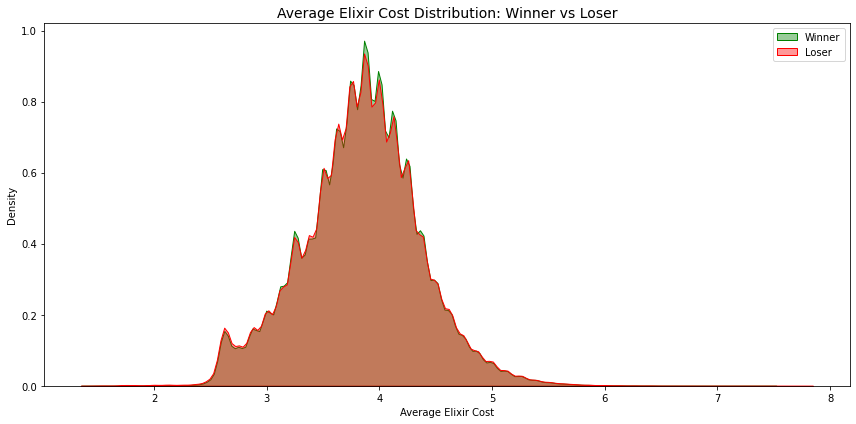

Winner Elixir - Mean: 3.84, Median: 3.88
Loser Elixir  - Mean: 3.83, Median: 3.88
Prop. of winners with heavier decks: 46.70%


In [62]:
# Average Elixir Distribution: Winner vs Loser
plt.figure(figsize=(12, 6))

# Use more bins and adjust KDE bandwidth for smoother curves
sns.kdeplot(df['winner.elixir.average'], color='green', alpha=0.4, label='Winner', fill=True, bw_adjust=1.5)
sns.kdeplot(df['loser.elixir.average'], color='red', alpha=0.4, label='Loser', fill=True, bw_adjust=1.5)

plt.title('Average Elixir Cost Distribution: Winner vs Loser', fontsize=14)
plt.xlabel('Average Elixir Cost')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Winner Elixir - Mean: {df['winner.elixir.average'].mean():.2f}, Median: {df['winner.elixir.average'].median():.2f}")
print(f"Loser Elixir  - Mean: {df['loser.elixir.average'].mean():.2f}, Median: {df['loser.elixir.average'].median():.2f}")

print(f"Prop. of winners with heavier decks: {(df['winner.elixir.average'] - df['loser.elixir.average'] > 0).mean():.2%}")

**Observations:**
This shows that while this is little difference in terms of mean and medians, overall, lower elixer decks do better. This tracks with in game knowledge that generally, deck types with lower elixer that are "cycle" based are a good archetype.

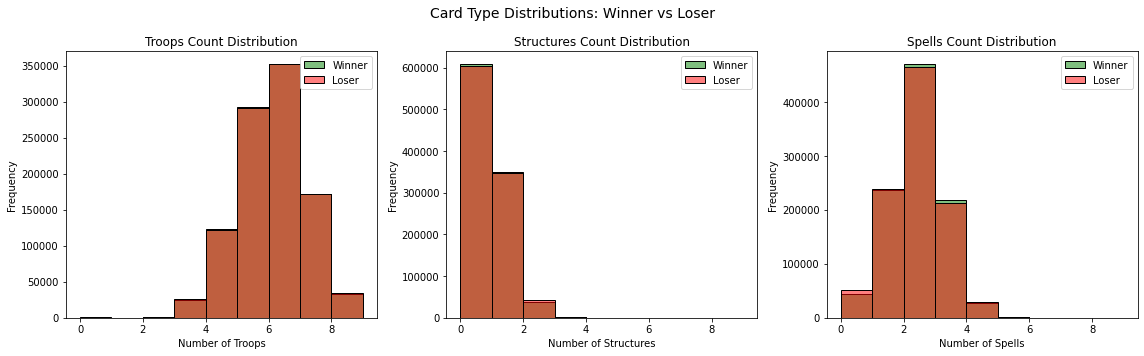

Card Type Summary Statistics:

Troops:
  Winner - Mean: 5.62
  Loser  - Mean: 5.61

Structures:
  Winner - Mean: 0.43
  Loser  - Mean: 0.45

Spells:
  Winner - Mean: 1.95
  Loser  - Mean: 1.94


In [63]:
card_types = ['troops', 'structures', 'spells']
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, ctype in enumerate(card_types):
    ax = axes[i]
    sns.histplot(df[f'winner.{ctype}'], bins=range(0, 10), kde=False, color='green', alpha=0.5, label='Winner', ax=ax)
    sns.histplot(df[f'loser.{ctype}'], bins=range(0, 10), kde=False, color='red', alpha=0.5, label='Loser', ax=ax)
    ax.set_title(f'{ctype.capitalize()} Count Distribution', fontsize=12)
    ax.set_xlabel(f'Number of {ctype.capitalize()}')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.suptitle('Card Type Distributions: Winner vs Loser', fontsize=14)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Card Type Summary Statistics:")
for ctype in card_types:
    print(f"\n{ctype.capitalize()}:")
    print(f"  Winner - Mean: {df[f'winner.{ctype}'].mean():.2f}")
    print(f"  Loser  - Mean: {df[f'loser.{ctype}'].mean():.2f}")

**Observations:**

For card types, troops dominate the count, while spells come in second. Then in general most decks will contain 1 or 2 structures(building cards)

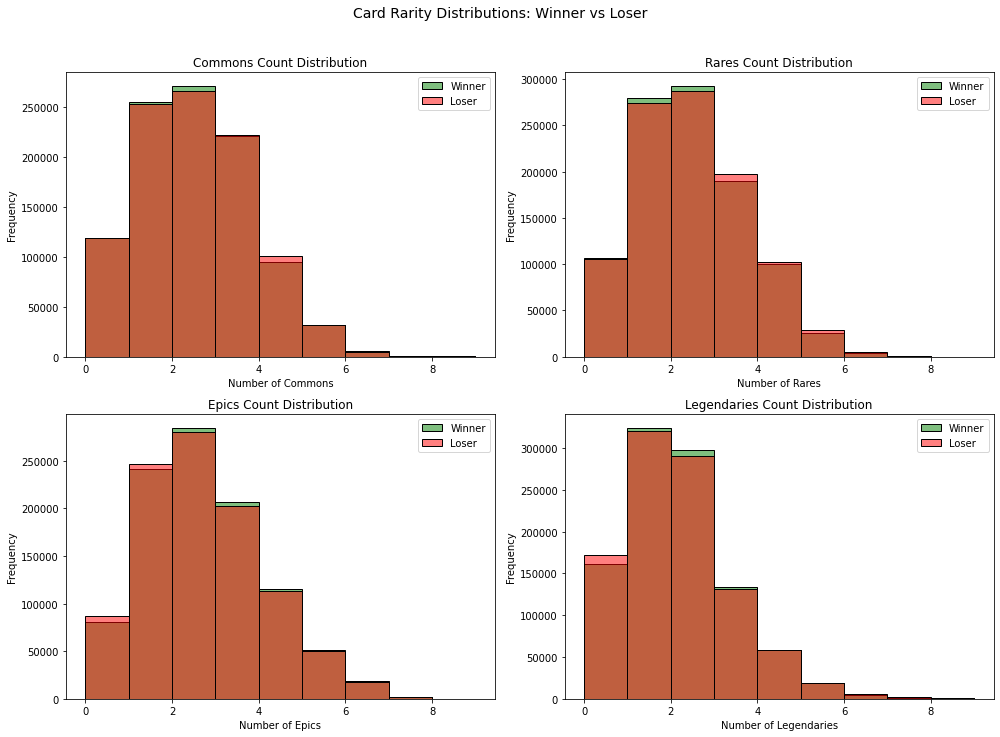

In [64]:
rarities = ['commons', 'rares', 'epics', 'legendaries']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, rarity in enumerate(rarities):
    ax = axes[i]
    sns.histplot(df[f'winner.{rarity}'], bins=range(0, 10), kde=False, color='green', alpha=0.5, label='Winner', ax=ax)
    sns.histplot(df[f'loser.{rarity}'], bins=range(0, 10), kde=False, color='red', alpha=0.5, label='Loser', ax=ax)
    ax.set_title(f'{rarity.capitalize()} Count Distribution', fontsize=12)
    ax.set_xlabel(f'Number of {rarity.capitalize()}')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.suptitle('Card Rarity Distributions: Winner vs Loser', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In terms of frequency, we are seeing a approximate normal distrbution of statistics across the board.
Card rarities are right skewed, as are trophy counts.

## Trophy Distribution Analysis

Instead of just looking at the raw distribution of trophies (which is symmetric due to matchmaking), we will analyze the **difference** in trophies between the winner and the loser. This reveals if having a slightly higher trophy count (within the matchmaking range) is a predictor of winning.

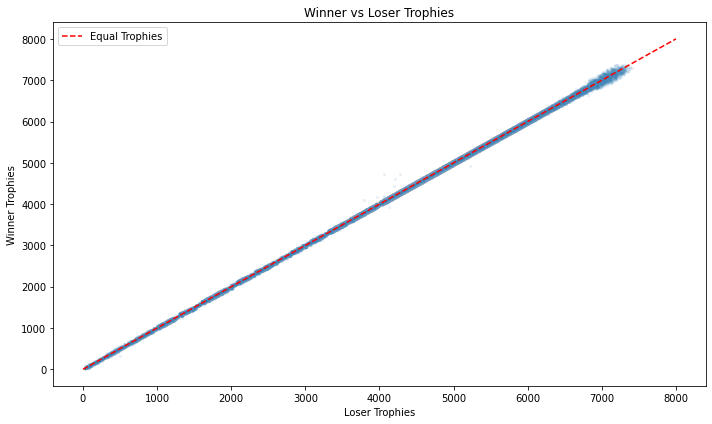

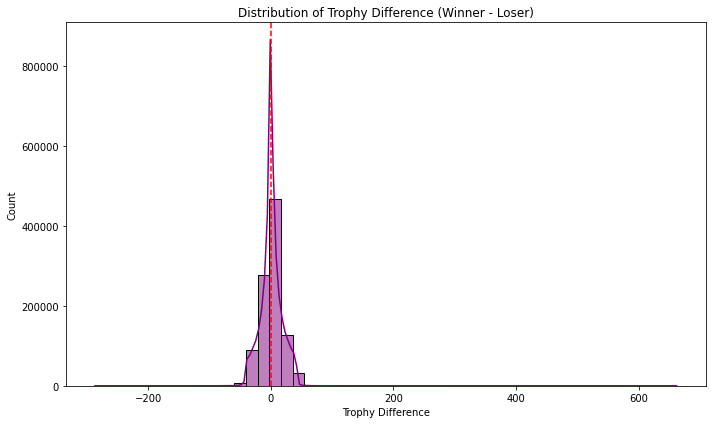

Percentage of matches where Winner has more trophies: 48.48%


In [65]:
# Calculate difference
df['trophy_diff'] = df['winner.trophies'] - df['loser.trophies']

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loser.trophies', y='winner.trophies', alpha=0.1, s=10)
plt.plot([0, 8000], [0, 8000], 'r--', label='Equal Trophies')  # Diagonal line
plt.title('Winner vs Loser Trophies')
plt.xlabel('Loser Trophies')
plt.ylabel('Winner Trophies')
plt.legend()
plt.tight_layout()
plt.show()

# Difference Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trophy_diff', bins=50, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Trophy Difference (Winner - Loser)')
plt.xlabel('Trophy Difference')
plt.tight_layout()
plt.show()

print(f"Percentage of matches where Winner has more trophies: {(df['trophy_diff'] > 0).mean():.2%}")

**Observations:**

The distributions of trophies for winners and losers are likely to be very similar due to the matchmaking system which pairs players of similar skill levels. But there is a slightly higher variation in trophies the higher up you get.

## Clan Membership Analysis

We analyze whether being in a clan provides a winning advantage. We will look at a confusion matrix/cross-tabulation of matches to see who wins when a player is in a clan.

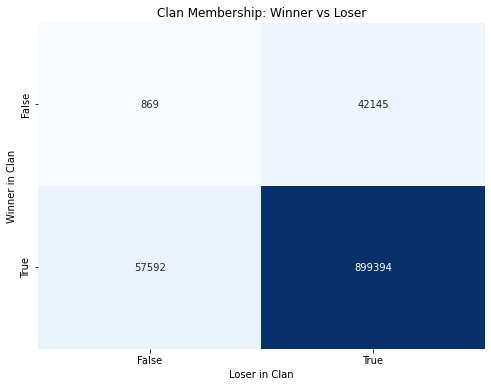

Matches where only one player is in a clan: 99737
Winner was the one in clan: 57592 (57.74%)
Loser was the one in clan: 42145 (42.26%)


In [66]:
clan_crosstab = pd.crosstab(df['winner.isinclan'], df['loser.isinclan'])
clan_crosstab.index.name = "Winner in Clan"
clan_crosstab.columns.name = "Loser in Clan"

plt.figure(figsize=(8, 6))
sns.heatmap(clan_crosstab, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Clan Membership: Winner vs Loser')
plt.show()

# Analyze the "Mixed" cases
winner_in_loser_out = clan_crosstab.loc[True, False]
winner_out_loser_in = clan_crosstab.loc[False, True]
total_mixed = winner_in_loser_out + winner_out_loser_in

print(f"Matches where only one player is in a clan: {total_mixed}")
print(f"Winner was the one in clan: {winner_in_loser_out} ({winner_in_loser_out/total_mixed:.2%})")
print(f"Loser was the one in clan: {winner_out_loser_in} ({winner_out_loser_in/total_mixed:.2%})")

**Observations:**

This chart shows the proportion of winners and losers who are in a clan. If the 'Yes' portion is significantly higher for winners, it suggests a clan advantage.

## Card Rarity Distribution

Does having more Epics or Legendaries than your opponent increase your chances of winning? We analyze the count differences.

/tmp/ipykernel_3072316/3318363016.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rarity', y='Difference', data=rarity_diff_data, palette='viridis', errorbar=('ci', 95))


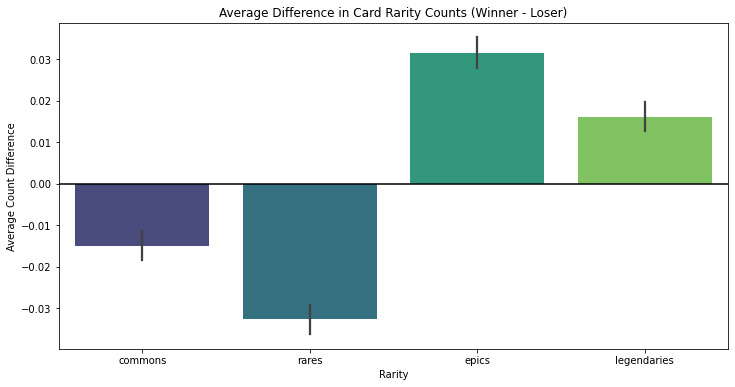

Interpretation: Positive bars indicate the winner typically has MORE of that rarity than the loser.


In [67]:
rarities = ['commons', 'rares', 'epics', 'legendaries']

# Calculate differences
for rarity in rarities:
    df[f'{rarity}_diff'] = df[f'winner.{rarity}'] - df[f'loser.{rarity}']

# Melt for plotting
rarity_diff_data = pd.melt(df[[f'{r}_diff' for r in rarities]], var_name='Rarity', value_name='Difference')
rarity_diff_data['Rarity'] = rarity_diff_data['Rarity'].str.replace('_diff', '')

plt.figure(figsize=(12, 6))
sns.barplot(x='Rarity', y='Difference', data=rarity_diff_data, palette='viridis', errorbar=('ci', 95))
plt.axhline(0, color='black', linestyle='-')
plt.title('Average Difference in Card Rarity Counts (Winner - Loser)')
plt.ylabel('Average Count Difference')
plt.show()

print("Interpretation: Positive bars indicate the winner typically has MORE of that rarity than the loser.")

**Observations:**

Violin plots show the density of card counts for each rarity. We look for shifts in the 'bulge' of the violin, indicating that winners might favor higher rarity cards.

## Feature Differences and "Advantage"

To better understand what drives a win, we calculate the difference between the winner's and loser's features for each match. This represents the "advantage" the winner had.

/tmp/ipykernel_3072316/1085057858.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trophy_corrs.values, y=trophy_corrs.index, palette='viridis')


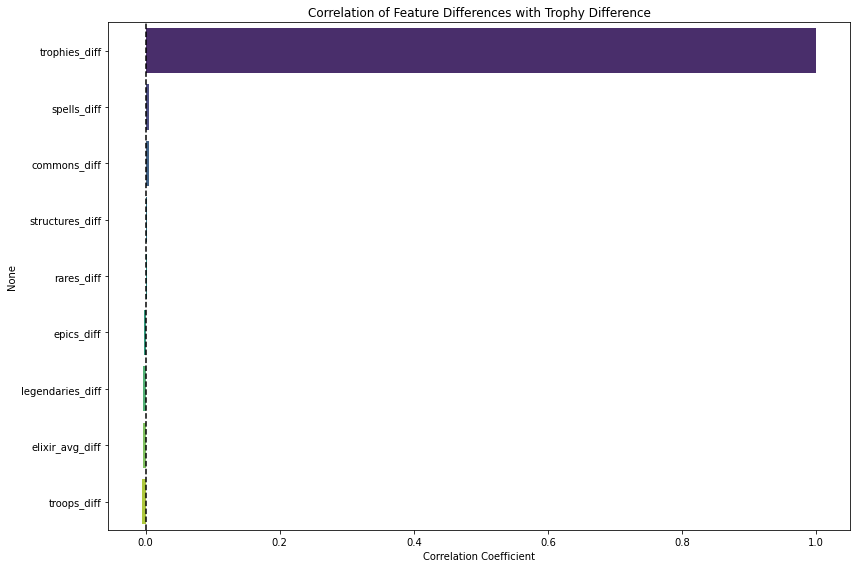

Correlations with Trophy Difference:
trophies_diff       1.000000
spells_diff         0.005172
commons_diff        0.005077
structures_diff     0.002012
rares_diff          0.001459
epics_diff         -0.002773
legendaries_diff   -0.003850
elixir_avg_diff    -0.004743
troops_diff        -0.005286
Name: trophies_diff, dtype: float64


In [68]:
# Create difference columns
feature_pairs = [
    ('trophies', 'winner.trophies', 'loser.trophies'),
    ('troops', 'winner.troops', 'loser.troops'),
    ('structures', 'winner.structures', 'loser.structures'),
    ('spells', 'winner.spells', 'loser.spells'),
    ('commons', 'winner.commons', 'loser.commons'),
    ('rares', 'winner.rares', 'loser.rares'),
    ('epics', 'winner.epics', 'loser.epics'),
    ('legendaries', 'winner.legendaries', 'loser.legendaries'),
    ('elixir_avg', 'winner.elixir.average', 'loser.elixir.average')
]

diff_cols = []
for name, win_col, lose_col in feature_pairs:
    if win_col in df.columns and lose_col in df.columns:
        col_name = f'{name}_diff'
        df[col_name] = df[win_col] - df[lose_col]
        diff_cols.append(col_name)

# Correlation with Trophy Difference
if 'trophies_diff' in df.columns:
    trophy_corrs = df[diff_cols].corr()['trophies_diff'].sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=trophy_corrs.values, y=trophy_corrs.index, palette='viridis')
    plt.title('Correlation of Feature Differences with Trophy Difference')
    plt.xlabel('Correlation Coefficient')
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()
    
    print("Correlations with Trophy Difference:")
    print(trophy_corrs)

**Observations:**
This chart shows which feature differences correlate with the trophy difference. For example, if 'legendaries_diff' has a positive correlation, it means that when the winner has *more* legendaries than the loser, the trophy gap tends to be larger (or vice versa).

## Significance Testing

Are the observed differences between winners and losers statistically significant? We use paired t-tests to find out.

In [69]:
from scipy import stats

results = []
for name, win_col, lose_col in feature_pairs:
    if win_col in df.columns and lose_col in df.columns:
        # Paired t-test
        t_stat, p_val = stats.ttest_rel(df[win_col], df[lose_col])
        results.append({
            'Feature': name,
            'Winner Mean': df[win_col].mean(),
            'Loser Mean': df[lose_col].mean(),
            'Difference': df[win_col].mean() - df[lose_col].mean(),
            'P-Value': p_val
        })

stats_df = pd.DataFrame(results)
stats_df = stats_df.sort_values(by='P-Value')

print("Summary Statistics Table (Sorted by P-Value):")
display(stats_df)

Summary Statistics Table (Sorted by P-Value):


,Feature,Winner Mean,Loser Mean,Difference,P-Value
0,trophies,4732.462993,4731.791999,0.670994,0.000000e+00
5,rares,1.991118,2.023654,-0.032536,2.366737e-77
2,structures,0.434842,0.449681,-0.014839,7.470168e-69
6,epics,2.275796,2.244362,0.031434,2.301688e-58
7,legendaries,1.695329,1.679257,0.016072,4.738489e-22
3,spells,1.948166,1.937398,0.010768,4.528805e-19
4,commons,2.037757,2.052727,-0.014970,2.460326e-16
8,elixir_avg,3.835736,3.831667,0.004070,3.250819e-08
1,troops,5.616992,5.612921,0.004071,6.751474e-03


**Observations:**
The P-values indicate the probability of observing such a difference by chance. Extremely low p-values (typically < 0.05) suggest that the difference is statistically significant.
- Trophies: Winners have slightly more trophies on average.
- Card Rarities: There are significant differences in the counts of different card rarities between winners and losers.
- Elixir: The difference in average elixir cost is also statistically significant.

## Win Rate by Feature Difference

This analysis transforms each match into two perspectives (winner and loser) to calculate how win probability changes as feature advantages increase. This directly shows the predictive power of each feature difference.

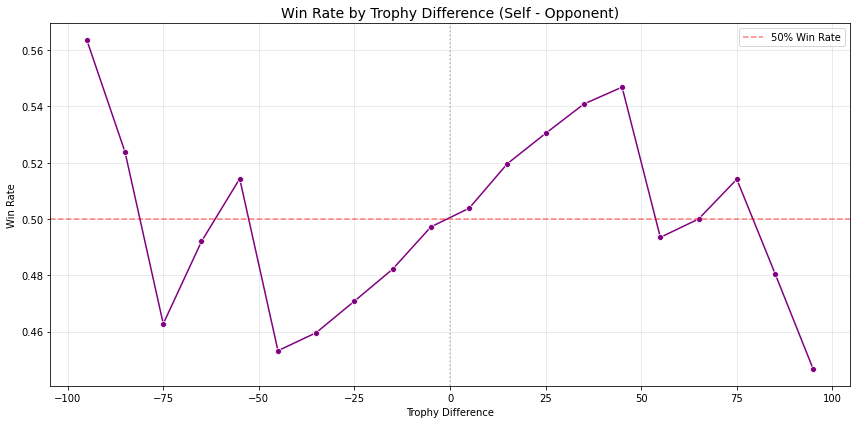

Interpretation: Points above 50% line indicate a trophy advantage increases win probability.


In [70]:
# Win Rate by Trophy Difference
# Transform: Winner perspective (diff, result=1) + Loser perspective (-diff, result=0)
trophy_diff_vals = df['winner.trophies'] - df['loser.trophies']

win_df = pd.DataFrame({'diff': trophy_diff_vals, 'result': 1})
loss_df = pd.DataFrame({'diff': -trophy_diff_vals, 'result': 0})
combined_df = pd.concat([win_df, loss_df], ignore_index=True)

# Bin the differences
combined_df['diff_bin'] = pd.cut(combined_df['diff'], bins=range(-200, 205, 10))
win_rate_df = combined_df.groupby('diff_bin', observed=True)['result'].agg(['mean', 'count']).reset_index()
win_rate_df['diff_mid'] = win_rate_df['diff_bin'].apply(lambda x: x.mid)
win_rate_df = win_rate_df[win_rate_df['count'] > 100]  # Filter low-count bins

plt.figure(figsize=(12, 6))
sns.lineplot(data=win_rate_df, x='diff_mid', y='mean', marker='o', color='purple')
plt.axhline(0.5, color='red', linestyle='--', alpha=0.5, label='50% Win Rate')
plt.axvline(0, color='gray', linestyle=':', alpha=0.5)
plt.title('Win Rate by Trophy Difference (Self - Opponent)', fontsize=14)
plt.xlabel('Trophy Difference')
plt.ylabel('Win Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Interpretation: Points above 50% line indicate a trophy advantage increases win probability.")

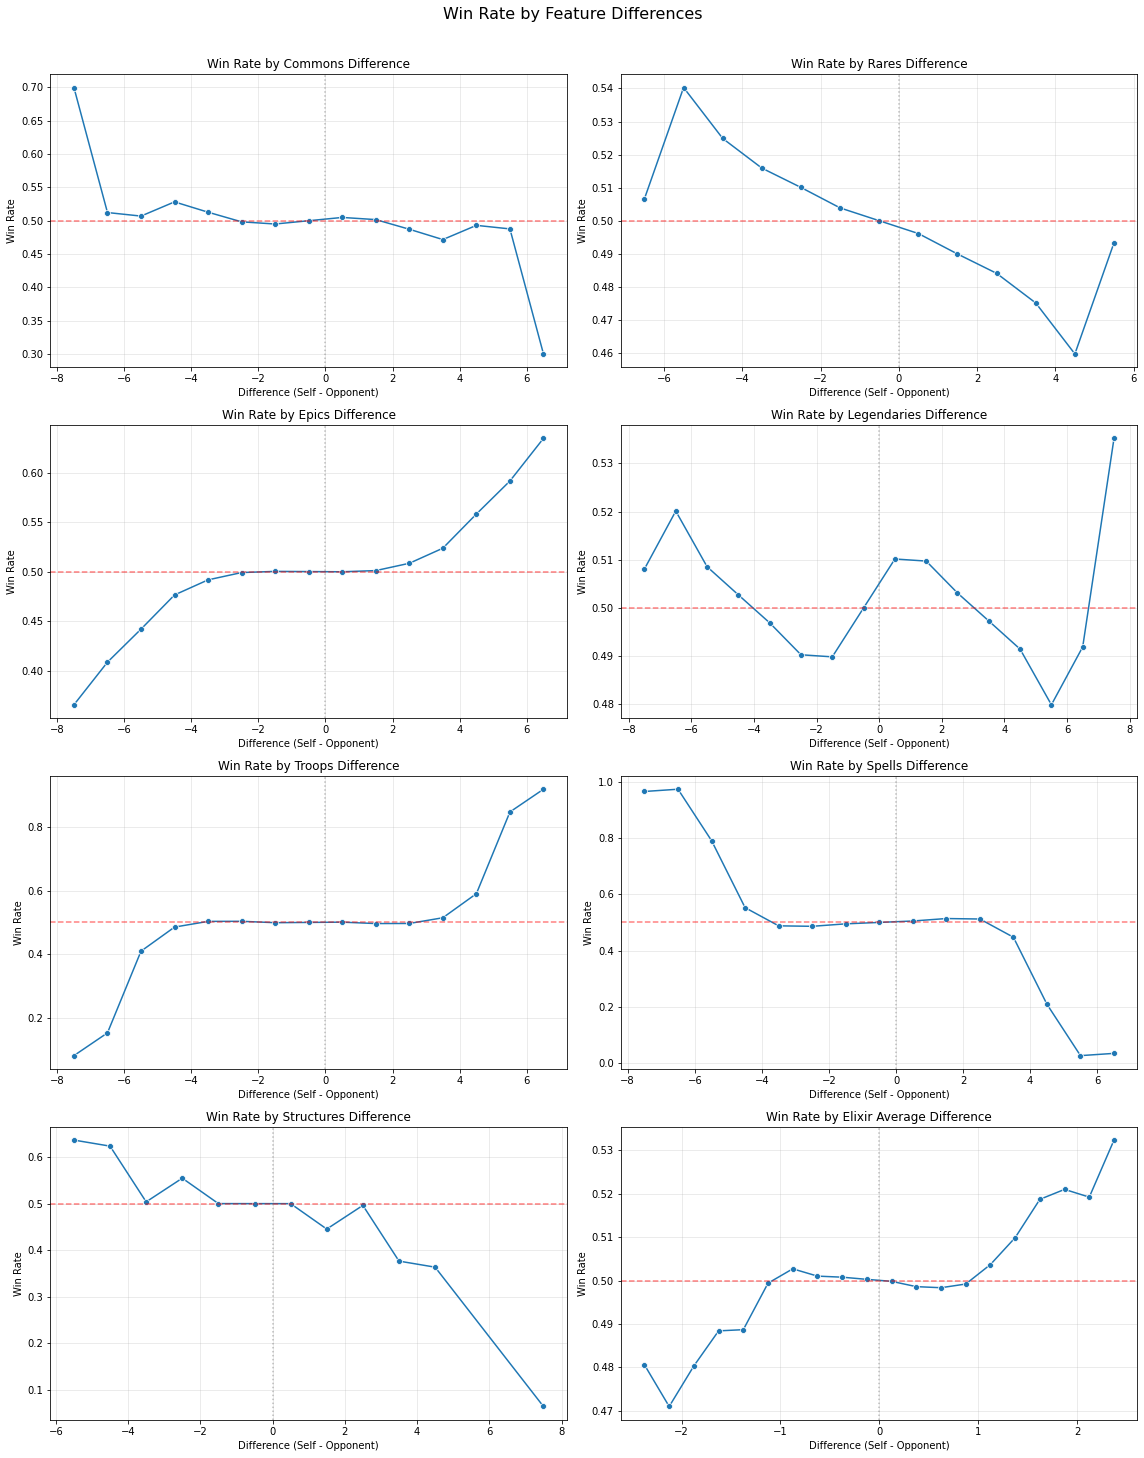

Interpretation: Steeper slopes indicate stronger predictive power for that feature.


In [71]:
# Win Rate by All Feature Differences (4x2 Grid)
diff_features = ["commons", "rares", "epics", "legendaries", "troops", "spells", "structures", "elixir.average"]

# Define bin settings for different feature types
bin_settings = {
    "troops": range(-8, 9),
    "spells": range(-8, 9),
    "structures": range(-8, 9),
    "commons": range(-8, 9),
    "rares": range(-8, 9),
    "epics": range(-8, 9),
    "legendaries": range(-8, 9),
    "elixir.average": np.linspace(-2.5, 2.5, 21)  # 0.25 steps
}

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, feature in enumerate(diff_features):
    # Calculate difference
    diff_vals = df[f'winner.{feature}'] - df[f'loser.{feature}']
    
    # Winner perspective: diff = val, result = 1
    # Loser perspective: diff = -val, result = 0
    win_vals = diff_vals
    loss_vals = -diff_vals
    
    combined_diff = pd.concat([win_vals, loss_vals], ignore_index=True)
    combined_result = pd.concat([pd.Series([1]*len(win_vals)), pd.Series([0]*len(loss_vals))], ignore_index=True)
    
    temp_df = pd.DataFrame({'diff': combined_diff, 'result': combined_result})
    
    # Determine bins
    bins = bin_settings.get(feature, 20)
    temp_df['diff_bin'] = pd.cut(temp_df['diff'], bins=bins)
    
    # Calculate win rate
    win_rate_agg = temp_df.groupby('diff_bin', observed=True)['result'].agg(['mean', 'count']).reset_index()
    win_rate_agg['diff_mid'] = win_rate_agg['diff_bin'].apply(lambda x: x.mid)
    
    # Filter out bins with very few samples
    win_rate_agg = win_rate_agg[win_rate_agg['count'] > 100]

    # Plot
    ax = axes[i]
    sns.lineplot(data=win_rate_agg, x='diff_mid', y='mean', marker='o', ax=ax)
    ax.set_title(f'Win Rate by {feature.replace(".", " ").title()} Difference', fontsize=12)
    ax.set_xlabel('Difference (Self - Opponent)')
    ax.set_ylabel('Win Rate')
    ax.axhline(0.5, color='red', linestyle='--', alpha=0.5)
    ax.axvline(0, color='gray', linestyle=':', alpha=0.5)
    ax.grid(True, alpha=0.3)

plt.suptitle('Win Rate by Feature Differences', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

print("Interpretation: Steeper slopes indicate stronger predictive power for that feature.")

## Feature Importance: Correlation with Win Result

We create a symmetrical dataset where each match contributes two rows (winner perspective with result=1, loser perspective with result=0). The correlation of each feature difference with the result directly measures its predictive importance.

In [72]:
# Build difference DataFrame
df_diff = pd.DataFrame()
df_diff['trophies'] = df['winner.trophies'] - df['loser.trophies']
df_diff['commons'] = df['winner.commons'] - df['loser.commons']
df_diff['rares'] = df['winner.rares'] - df['loser.rares']
df_diff['epics'] = df['winner.epics'] - df['loser.epics']
df_diff['legendaries'] = df['winner.legendaries'] - df['loser.legendaries']
df_diff['troops'] = df['winner.troops'] - df['loser.troops']
df_diff['spells'] = df['winner.spells'] - df['loser.spells']
df_diff['structures'] = df['winner.structures'] - df['loser.structures']
df_diff['elixir_avg'] = df['winner.elixir.average'] - df['loser.elixir.average']

# Create symmetrical dataset: winner perspective (result=1) + loser perspective (result=0)
full_data = pd.concat([
    df_diff.assign(result=1),
    (-df_diff).assign(result=0)
], ignore_index=True)

# Calculate correlations with result
correlations = full_data.corr()[['result']].drop('result')
correlations = correlations.sort_values(by='result', ascending=False)

# Display as formatted table
print("=" * 50)
print("FEATURE IMPORTANCE: Correlation with Win Result")
print("=" * 50)
print(f"{'Feature':<20} | {'Correlation':>12}")
print("-" * 50)
for idx, row in correlations.iterrows():
    print(f"{idx:<20} | {row['result']:>12.4f}")
print("-" * 50)
print("\nInterpretation:")
print("  • Positive correlation = Higher value increases win probability")
print("  • Negative correlation = Higher value decreases win probability")
print("  • Magnitude indicates strength of predictive power")

FEATURE IMPORTANCE: Correlation with Win Result
Feature              |  Correlation
--------------------------------------------------
trophies             |       0.0393
epics                |       0.0161
legendaries          |       0.0097
spells               |       0.0089
elixir_avg           |       0.0055
troops               |       0.0027
commons              |      -0.0082
structures           |      -0.0175
rares                |      -0.0186
--------------------------------------------------

Interpretation:
  • Positive correlation = Higher value increases win probability
  • Negative correlation = Higher value decreases win probability
  • Magnitude indicates strength of predictive power


/tmp/ipykernel_3072316/550896456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations['result'], y=correlations.index, palette=colors)


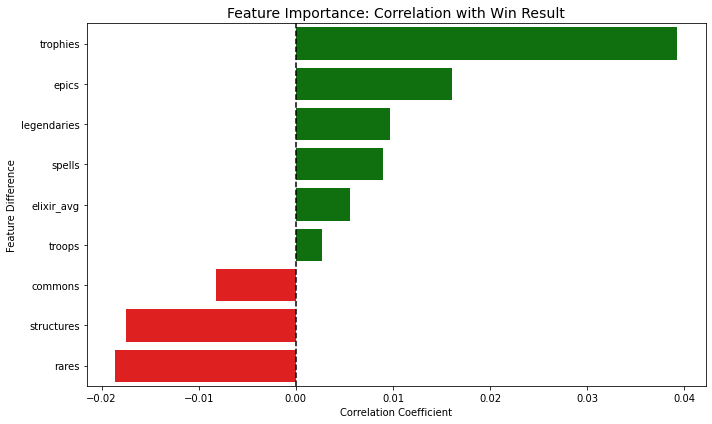

In [73]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in correlations['result']]
sns.barplot(x=correlations['result'], y=correlations.index, palette=colors)
plt.axvline(0, color='black', linestyle='--')
plt.title('Feature Importance: Correlation with Win Result', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature Difference')
plt.tight_layout()
plt.show()

## Card-Level Analysis: Per-Card Win Rate Correlation

We parse the card IDs from each deck and calculate how each individual card correlates with winning.

In [74]:
import ast

card_sample_size = 50000
df_card_sample = df.sample(min(card_sample_size, len(df)), random_state=42).copy()

# Function to safely parse the string representation of lists
def safe_parse(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df_card_sample['winner.cards_list'] = df_card_sample['winner.cards'].apply(safe_parse)
df_card_sample['loser.cards_list'] = df_card_sample['loser.cards'].apply(safe_parse)
deck_data = []

# Process winners (result=1)
for cards in df_card_sample['winner.cards_list']:
    deck_info = {str(card): 1 for card in cards}
    deck_info['result'] = 1
    deck_data.append(deck_info)

# Process losers (result=0)
for cards in df_card_sample['loser.cards_list']:
    deck_info = {str(card): 1 for card in cards}
    deck_info['result'] = 0
    deck_data.append(deck_info)

# Create DataFrame (fillna(0) handles cards not present in a deck)
cards_df = pd.DataFrame(deck_data).fillna(0)
card_correlations = cards_df.corr()['result'].drop('result')
card_correlations = card_correlations.reindex(card_correlations.abs().sort_values(ascending=False).index)
print(f"Analyzed {len(df_card_sample)} matches, {len(card_correlations)} unique cards found.\n")

Analyzed 50000 matches, 102 unique cards found.



In [75]:
# Display card correlations (top 20 highest and lowest)
print("CARD WIN RATE CORRELATIONS (Sorted by Absolute Value)")
print(f"{'Card ID':<15} | {'Correlation':>12} | {'Interpretation':<20}")
print("-" * 55)

for i, card_id in enumerate(card_correlations.index[:20]):
    corr = card_correlations[card_id]
    interpretation = "Favors Winning" if corr > 0 else "Favors Losing"
    print(f"{card_id:<15} | {corr:>12.4f} | {interpretation:<20}")

print("-" * 55)
print(f"\nTop 5 cards that correlate with WINNING:")
for card_id in card_correlations.nlargest(5).index:
    print(f"  Card {card_id}: {card_correlations[card_id]:+.4f}")

print(f"\nTop 5 cards that correlate with LOSING:")
for card_id in card_correlations.nsmallest(5).index:
    print(f"  Card {card_id}: {card_correlations[card_id]:+.4f}")

CARD WIN RATE CORRELATIONS (Sorted by Absolute Value)
Card ID         |  Correlation | Interpretation      
-------------------------------------------------------
26000014        |      -0.0237 | Favors Losing       
26000001        |      -0.0232 | Favors Losing       
27000009        |      -0.0193 | Favors Losing       
26000003        |      -0.0162 | Favors Losing       
26000067        |      -0.0154 | Favors Losing       
27000001        |      -0.0152 | Favors Losing       
26000002        |      -0.0148 | Favors Losing       
28000011        |       0.0144 | Favors Winning      
28000006        |      -0.0136 | Favors Losing       
27000010        |      -0.0121 | Favors Losing       
27000005        |      -0.0121 | Favors Losing       
26000036        |       0.0118 | Favors Winning      
28000013        |      -0.0111 | Favors Losing       
28000000        |      -0.0109 | Favors Losing       
26000019        |      -0.0109 | Favors Losing       
26000044        |       0.

/tmp/ipykernel_3072316/2746579420.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cards.values, y=top_cards.index, palette=colors)


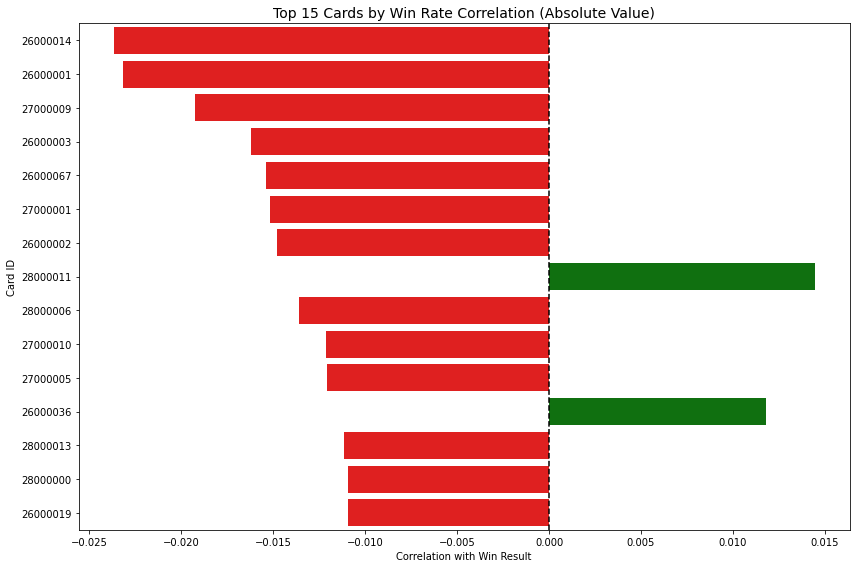

In [77]:
# Visualize top cards by correlation
top_n = 15
top_cards = card_correlations.head(top_n)

plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in top_cards.values]
sns.barplot(x=top_cards.values, y=top_cards.index, palette=colors)
plt.axvline(0, color='black', linestyle='--')
plt.title(f'Top {top_n} Cards by Win Rate Correlation (Absolute Value)', fontsize=14)
plt.xlabel('Correlation with Win Result')
plt.ylabel('Card ID')
plt.tight_layout()
plt.show()


**Observations:**
- Cards with positive correlations tend to appear more frequently in winning decks
- Cards with negative correlations may be underperforming in the current meta
- The magnitude indicates how strongly a card influences win probability